# Case Study 4.1 - Movies

<h1 style="color:red;">Note: If you close this notebook at any time, you will have to run all cells again upon re-opening it.</h1>

<h1 style="color:red;">Note: You may get different numerical results running the notebook different times. This is to be expected, you can just report whatever results you get.</h1>

# BEGINNER PYTHON

As this is a beginner version, we include a lot of code here to help you along the way.

**First, fill in your identification information below. Then, you only have to type in the answers to the questions we ask you. For the rest of the cells, just Run them by pressing the "Run" button above.**

# Identification Information

In [1]:
# YOUR NAME              = ...
# YOUR MITX PRO USERNAME = ...
# YOUR MITX PRO E-MAIL   = ...

# Setup

Run these cells to install all the packages you need to complete the remainder of the case study. This may take a few minutes, so please be patient.

In [ ]:
!pip install --upgrade pip
!pip install surprise==0.1

If you do not see any red text, then the install was successful. Yellow text is just warnings, not errors.

Now, you must press **Kernel > Restart.** This allows the installation to take effect. Once you see the blue **Connected/Kernel ready** button in the top right, you are good to go. If you don't see that blue indicator, then your kernel may not be working properly. If this happens, try saving your work, closing the notebook and re-opening it.

# Import

Import the required tools into the notebook.

In [1]:
import pandas as pd
import matplotlib
from surprise import Dataset, SVD, NormalPredictor, BaselineOnly, KNNBasic, NMF
from surprise.model_selection import cross_validate, KFold
%matplotlib inline
print('\n\nImports successful!')



Imports successful!


# Data

Load the MovieLens data. A dialog may pop up saying **"Dataset ml-100k could not be found. Do you want to download it? [Y/n]"** Type Y and hit Enter to start the download process.

In [2]:
data = Dataset.load_builtin('ml-100k')
print('\n\nData load successful!')



Data load successful!


We also want to get a sense of what the data looks like. Let's create a histogram of all the ratings we have in the dataset.

In [12]:
data.ratings_file

'/Users/matthewhwang/.surprise_data/ml-100k/ml-100k/u.data'

In [6]:
len(raw_data.user_id.unique())

943

In [7]:
len(raw_data.item_id.unique())

1682

/Users/matthewhwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  




Histogram generation successful!


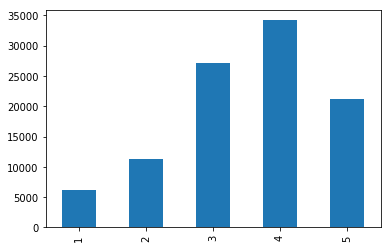

In [5]:
# 1. Get the ratings file from the data object
# This is just a filename that has all the data stored in it
ratings_file = data.ratings_file

# 2. Load that table using pandas, a commmon python data loading tool
# We set the column names manually here
col_names = ['user_id', 'item_id', 'rating', 'timestamp']
raw_data = pd.read_table(ratings_file, names=col_names)

# 3. Get the rating column
ratings = raw_data.rating

# 4. Generate a bar plot/histogram of that data
ratings.value_counts().sort_index().plot.bar()

print('\n\nHistogram generation successful!')

<h1 style="color:red;">QUESTION 1: DATA ANALYSIS</h1>

**Describe the dataset. How many ratings are in the dataset? How would you describe the distribution of ratings? Is there anything else we should observe? Make sure the histogram is visible in the notebook.**

There are 100,000 entries in the dataset.  The data set is skewed to the right with a score of 4 being the most common.

# Model 1: Random

In [6]:
# Create model object
model_random = NormalPredictor()
print('\n\nModel creation successful!')



Model creation successful!


In [7]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
model_random_results = cross_validate(model_random, data, measures=['RMSE'], cv=5, verbose=True)
print('\n\nModel training successful!')

Evaluating RMSE of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.5193  1.5389  1.5169  1.5200  1.5186  1.5227  0.0082  
Fit time          0.15    0.17    0.17    0.17    0.17    0.17    0.01    
Test time         0.20    0.18    0.31    0.26    0.19    0.23    0.05    


Model training successful!


# Model 2: User-Based Collaborative Filtering

In [8]:
# Create model object
model_user = KNNBasic(sim_options={'user_based': True})
print('\n\nModel creation successful!')



Model creation successful!


In [9]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
# Note, this may have a lot of print output
# You can set verbose=False to prevent this from happening
model_user_results = cross_validate(model_user, data, measures=['RMSE'], cv=5, verbose=True)
print('\n\nModel training successful!')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9803  0.9831  0.9725  0.9822  0.9751  0.9786  0.0041  
Fit time          0.47    0.49    0.48    0.48    0.49    0.48    0.01    
Test time         4.41    4.20    4.19    4.22    4.20    4.24    0.09    


Model training successful!


# Model 3: Item-Based Collaborative Filtering

In [10]:
# Create model object
model_item = KNNBasic(sim_options={'user_based': False})
print('\n\nModel creation successful!')



Model creation successful!


In [11]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
# Note, this may have a lot of print output
# You can set verbose=False to prevent this from happening
model_item_results = cross_validate(model_item, data, measures=['RMSE'], cv=5, verbose=True)
print('\n\nModel training successful!')

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9757  0.9739  0.9811  0.9633  0.9767  0.9741  0.0059  
Fit time          0.70    0.75    0.69    0.92    0.70    0.75    0.09    
Test time         5.37    4.89    5.15    5.60    5.07    5.22    0.25    


Model training successful!


<h1 style="color:red;">QUESTION 2: COLLABORATIVE FILTERING MODELS</h1>

**Compare the results from the user-user and item-item models. How do they compare to each other? How do they compare to our original "random" model? Can you provide any intuition as to why the results came out the way they did?**

Random had the fastest train time but the worst RSME.  The User based and Item based collaborative models performed roughly with the same RMSE, but the test time for the User based RMSE was 20% faster than the Item based.  This most likely stems from the fact that there are about 950 unique users while there are ~1600 unique items.

# Model 4: Matrix Factorization

In [21]:
# Create model object
model_matrix = SVD()
print('\n\nModel creation successful!')



Model creation successful!


In [22]:
# Train on data using cross-validation with k=5 folds, measuring the RMSE
# Note, this may take some time (2-3 minutes) to train, so please be patient
model_matrix_results = cross_validate(model_matrix, data, measures=['RMSE'], cv=5, verbose=True)
print('\n\nModel training successful!')

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9422  0.9303  0.9293  0.9383  0.9412  0.9363  0.0054  
Fit time          6.76    6.74    6.72    6.74    7.52    6.90    0.31    
Test time         0.32    0.22    0.30    0.21    0.32    0.27    0.05    


Model training successful!


<h1 style="color:red;">QUESTION 3: MATRIX FACTORIZATION MODEL</h1>

**The matrix factorization model is different from the collaborative filtering models. Briefly describe this difference. Also, compare the RMSE again. Does it improve? Can you offer any reasoning as to why that might be?**

The Matrix Factorization model performed better than the user / item based collaborative models.  Matrix factorization attempts to estimate the full comparison matrix with two embedding vectors while collaborative filtering models use the behaviors of users / itmes that are similar to one another to fill in the gaps in the collaborative matrix.  Matrix factorization performs better in this case as it takes into account a global view rather than a neighborhood approach.

Timing-wise, the collaborative models have a relatively shorter fit time than test time whereas the matrix factorization model has a longer fit time than test time.  So with the matrix factorization model has more up front calc time, but the testing is quicker due to less comparisons needed to determine similarity of items / users.

# Precision and Recall @ `k`

We now want to compute the precision and recall for 2 values of `k`: 5 and 10. We have provided some code here to help you do that.

First, we define a function that takes in some predictions, a value of `k` and a threshold parameter. This code is adapted from [here](http://surprise.readthedocs.io/en/stable/FAQ.html?highlight=precision#how-to-compute-precision-k-and-recall-k). **Make sure you run this cell.**

In [23]:
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = dict()
    for uid, _, true_r, est, _ in predictions:
        current = user_est_true.get(uid, list())
        current.append((est, true_r))
        user_est_true[uid] = current

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

print('\n\nFunction creation successful!')



Function creation successful!


Next, we compute the precision and recall at `k` = 5 and 10 for each of our 4 models. We use 5-fold cross validation again to average the results across the entire dataseat.

Please note that this will take some time to compute.

<h1 style="color:red;">QUESTION 4: PRECISION/RECALL</h1>

**Compute the precision and recall, for each of the 4 models, at `k` = 5 and 10. This is 2 x 2 x 4 = 16 numerical values. Do you note anything interesting about these values? Anything differerent from the RMSE values you computed above?**

Item Based collaborative model has the highest precision of all models for both k = 5 and k = 10.  User based collaborative model has the highest recall of all the models for both k = 5 and k = 10.  Therefore the Item based collaborative model is more conservative while the user based model is more aggressive.  Recall seems to go up with higher K values across the board and precision seems to drop.

Matrix factorization had the lowest RMSE, but was out performed by the collaborative models.  This may point to neighborhood approach being more influential to a global approach in the context of movie recommendations.

In [24]:
# Make list of k values
K = [5, 10]

# Make list of models
models = [model_random, model_user, model_item, model_matrix]

# Create k-fold cross validation object
kf = KFold(n_splits=5)

for k in K:
    for model in models:
        print(f'>>> k={k}, model={model.__class__.__name__}')
        # Run folder and take average
        p = []
        r = []
        for trainset, testset in kf.split(data):
            model.fit(trainset)
            predictions = model.test(testset, verbose=False)
            precisions, recalls = precision_recall_at_k(predictions, k=k, threshold=3.5)

            # Precision and recall can then be averaged over all users
            p.append(sum(prec for prec in precisions.values()) / len(precisions))
            r.append(sum(rec for rec in recalls.values()) / len(recalls))
        
        print('>>> precision:', round(sum(p) / len(p), 3))
        print('>>> reccall  :', round(sum(r) / len(r), 3))
        print('\n')

print('\n\nPrecision and recall computation successful!')

>>> k=5, model=NormalPredictor
>>> precision: 0.587
>>> reccall  : 0.34


>>> k=5, model=KNNBasic
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
>>> precision: 0.764
>>> reccall  : 0.454


>>> k=5, model=KNNBasic
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
>>> precision: 0.819
>>> reccall  : 0.386


>>> k=5, model=SVD
>>> precision: 0.78
>>> reccall  : 0.431


#  Top-`n` Predictions

Finally, we can see what some of the actual movie ratings are for particular users, as outputs of our model.

Again, we define a helpful function.

In [25]:
def get_top_n(predictions, n=5):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = dict()
    for uid, iid, true_r, est, _ in predictions:
        current = top_n.get(uid, [])
        current.append((iid, est))
        top_n[uid] = current

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

print('Function creation successful!')

Function creation successful!


Then, we call this function on each of our models, first training on **all** the data we have available, then predicting on the remaining, missing data. We use `n`=5 here, but you can pick any reasonable value of `n` you would like.

This may take some time to compute, so be patient.

In [26]:
trainset = data.build_full_trainset()
testset = trainset.build_anti_testset()
print('\n\nTrainset and testset creation successful!')



Trainset and testset creation successful!


<h1 style="color:red;">QUESTION 5: TOP N PREDICTIONS</h1>

**Do the top n predictions that you received make sense? What is the rating value (1-5) of these predictions? How could you use these predictions in the real-world if you were trying to build a generic content recommender system for a company?**

Yes, the predicted values are all highly rated movies ~4.5 and above, however none of the movies overlap from any of the models.  The predicted values can be used to recommend new content to each user for more engagement.

In [27]:
for model in models:
    model.fit(trainset)
    predictions = model.test(testset)
    top_n = get_top_n(predictions, n=5)
    # Print the first one
    user = list(top_n.keys())[0]
    print(f'model: {model}, {user}: {top_n[user]}')

print('\n\nTop N computation successful!')

model: <surprise.prediction_algorithms.random_pred.NormalPredictor object at 0x11b3f35c0>, 196: [('51', 5), ('1014', 5), ('274', 5), ('277', 5), ('88', 5)]
Computing the msd similarity matrix...
Done computing similarity matrix.
model: <surprise.prediction_algorithms.knns.KNNBasic object at 0x10828c780>, 196: [('1189', 5), ('1500', 5), ('814', 5), ('1536', 5), ('1599', 5)]
Computing the msd similarity matrix...
Done computing similarity matrix.
model: <surprise.prediction_algorithms.knns.KNNBasic object at 0x10828c208>, 196: [('1414', 4.666666666666667), ('1309', 4.5), ('1310', 4.5), ('1675', 4.333333333333333), ('1676', 4.3076923076923075)]
model: <surprise.prediction_algorithms.matrix_factorization.SVD object at 0x11bbdf128>, 196: [('178', 4.672895401796796), ('408', 4.54024965015179), ('169', 4.487084030597942), ('963', 4.455571608558042), ('654', 4.445846916245243)]


Top N computation successful!


Great job! Now, make sure you check out the **Conclusion** section of the [instruction manual](https://courses.edx.org/asset-v1:MITxPRO+DSx+2T2018+type@asset+block@4.1_instruction_manual.html) to wrap up this case study properly.